# Introduction

In [35]:
import sys
sys.path.append('/home/eugenie.marescaux/como/')
sys.path.append('/home/eugenie/Documents/code-mo/python/')
%pylab nbagg
import cma, como
import numpy as np
import time

Populating the interactive namespace from numpy and matplotlib


In [36]:
dim = 10
nb_ker = 10

In [37]:
ref_point = [11,11]
sigma0 = 0.1
fun1 = cma.ff.sphere
fun2 = lambda x: cma.ff.sphere(x-1)
fitness = como.FitFun(fun1, fun2)
restart = [-5, 5]

# Run

In [38]:
# initialization at random between -5 and 5
list_of_solvers = como.get_cmas(-5 + 10 * np.random.rand(nb_ker, dim), sigma0)
# restarts at random between -5 and 5
moes = como.Sofomore(list_of_solvers, opts = {'archive': True, 'restart': restart}, reference_point = ref_point)

In [39]:
lnb_ker = []
ltime = []

In [40]:
nb_iter = 10000
for i in range(nb_iter):
    t_start = time.time()
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
    moes.tell(solutions, objective_values)
    moes.disp()
    #if i % 100 == 0:
    #    print(str(moes.num_kernels) + " kernels \n")
    lnb_ker += [moes.num_kernels]
    ltime.append(time.time() - t_start)

Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 0.000000000000000e+00 1.0e+00 1.00e-01  1e-01  1e-01
    2     20 0.000000000000000e+00 1.0e+00 1.00e-01  1e-01  1e-01
    3     30 0.000000000000000e+00 1.0e+00 1.00e-01  1e-01  1e-01
  100   1000 0.000000000000000e+00 1.9e+00 2.82e-01  3e-01  3e-01
  200   2000 2.753794829256169e+01 2.3e+00 1.11e+00  1e+00  1e+00
  300   3000 7.709937929581834e+01 2.2e+00 7.12e-01  6e-01  7e-01
  400   4000 9.084506087630645e+01 2.1e+00 3.74e-01  3e-01  3e-01
  500   5000 9.608625018179448e+01 2.1e+00 1.80e-01  1e-01  2e-01
  600   6000 9.943974693277276e+01 2.2e+00 1.16e-01  7e-02  9e-02
  700   7000 1.005453067799925e+02 2.1e+00 6.86e-02  3e-02  5e-02
  800   8000 1.008142502088867e+02 2.2e+00 3.61e-02  2e-02  2e-02
  900   9000 1.008597954265488e+02 2.2e+00 2.05e-02  1e-02  1e-02
 1000  10000 1.008830582449595e+02 2.2e+00 1.22e-02  5e-03  7e-03
 1100  110

# Plots

## Dynamics : Evolution of the number of points

<IPython.core.display.Javascript object>


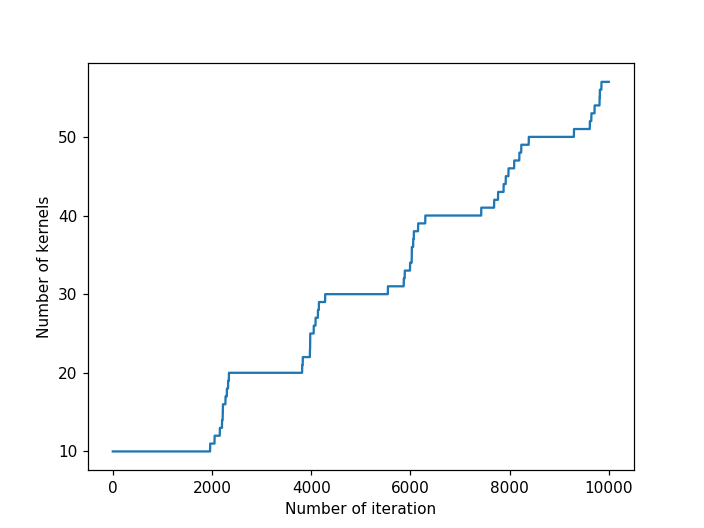

Text(0.5, 0, 'Number of iteration')

In [41]:
plt.figure()
plt.plot(lnb_ker)
plt.ylabel("Number of kernels")
plt.xlabel("Number of iteration")
#plt.title("f1 and f2 = sphere functions (min in 0 and 1), random restart in [-5, 5]")

## Dynamics : evolution of the convergence time of the kernels

<IPython.core.display.Javascript object>


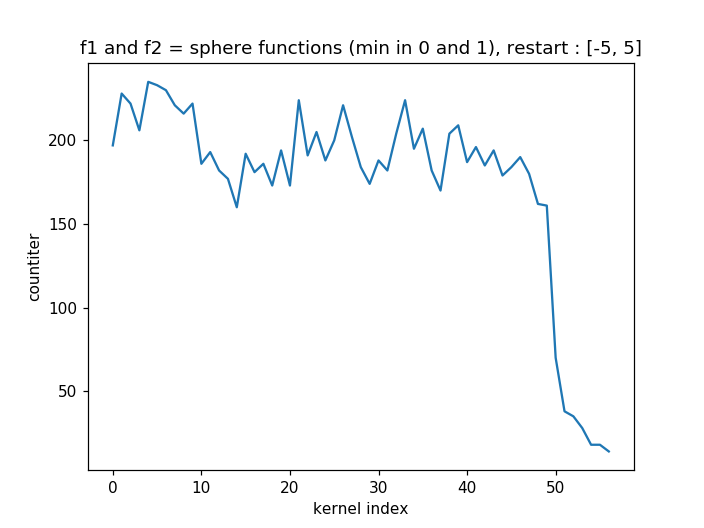

Text(0.5, 1.0, 'f1 and f2 = sphere functions (min in 0 and 1), restart : [-5, 5]')

In [42]:
lnb_iter = [ker.countiter for ker in moes.kernels] 
plt.figure()
plt.plot(lnb_iter)
plt.xlabel("kernel index")
plt.ylabel("countiter")
plt.title("f1 and f2 = sphere functions (min in 0 and 1), restart : " + str(restart))

## Front

<IPython.core.display.Javascript object>


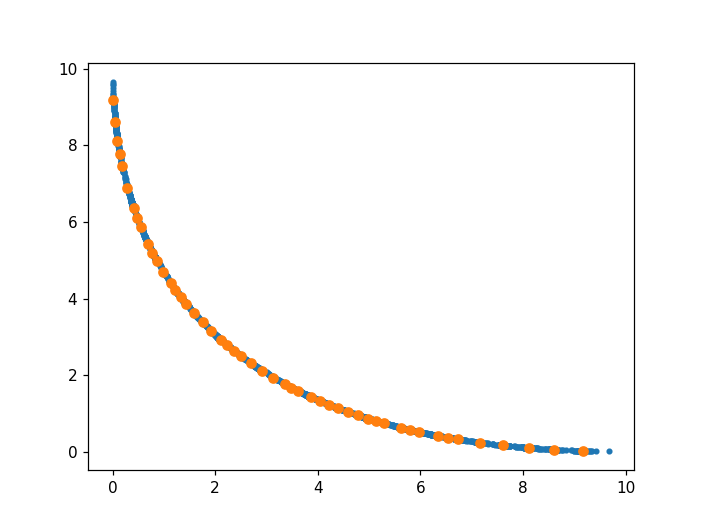

In [43]:
figure()
moes.logger.plot_front()

## Time

68.86171889305115


<IPython.core.display.Javascript object>


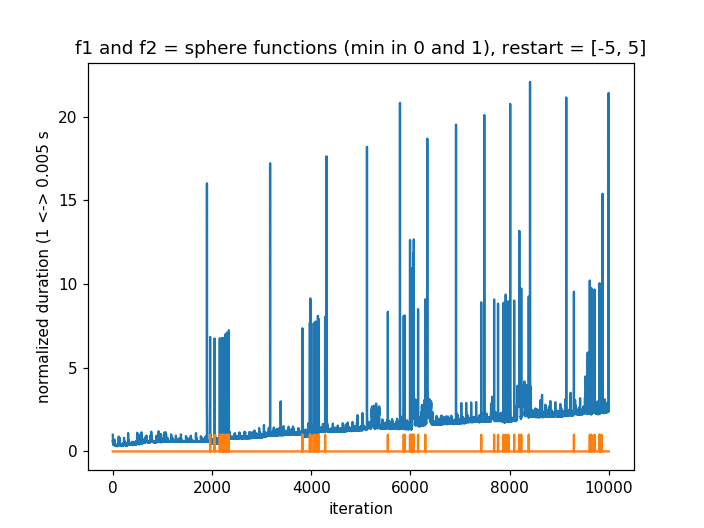

Text(0.5, 1.0, 'f1 and f2 = sphere functions (min in 0 and 1), restart = [-5, 5]')

In [49]:
total_time = sum(ltime)
print(total_time)
figure()
plt.plot(np.array(ltime)/ltime[0])
plt.plot([False] + [lnb_ker[i] > lnb_ker[i-1] for i in range(1, len(lnb_ker))])
plt.xlabel("iteration")
plt.ylabel("normalized duration (1 <-> " + str(round(ltime[0],3)) + " s")
plt.title("f1 and f2 = sphere functions (min in 0 and 1), restart = " + str(restart))